In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from scipy.stats import zscore
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Cust_Spend_Data.csv")

In [3]:
data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [4]:
#Distance computation

pdist
#help(pdist)
d_euc = pdist(data.iloc[:,2:7], metric = "euclidean")

In [5]:
#Building the cluster

#help(linkage)
clus1 = linkage(d_euc, method = "average")

Text(0.5,0.98,'Cluster Dendrogram')

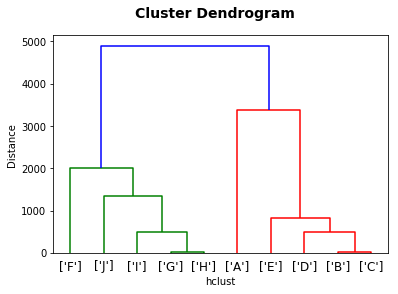

In [6]:
#Displaying the clusters in Dendrogram

dendrogram(clus1, labels = data[["Name"]].values.tolist())
plt.xlabel("hclust")
plt.ylabel("Distance")
plt.suptitle("Cluster Dendrogram", fontweight = 'bold', fontsize =14)

In [12]:
print(np.round(squareform(d_euc).tolist(),3))

[[   0.    3000.027 3000.007 3500.004 4000.018 6000.005 7500.008 7500.
  8000.    9000.003]
 [3000.027    0.       9.539  500.111 1000.024 3000.014 4500.006 4500.016
  5000.011 6000.007]
 [3000.007    9.539    0.     500.008 1000.042 3000.006 4500.008 4500.003
  5000.003 6000.002]
 [3500.004  500.111  500.008    0.     500.124 2500.004 4000.013 4000.002
  4500.002 5500.001]
 [4000.018 1000.024 1000.042  500.124    0.    2000.039 3500.    3500.019
  4000.015 5000.014]
 [6000.005 3000.014 3000.006 2500.004 2000.039    0.    1500.047 1500.016
  2000.009 3000.   ]
 [7500.008 4500.006 4500.008 4000.013 3500.    1500.047    0.      10.247
   500.09  1500.042]
 [7500.    4500.016 4500.003 4000.002 3500.019 1500.016   10.247    0.
   500.003 1500.012]
 [8000.    5000.011 5000.003 4500.002 4000.015 2000.009  500.09   500.003
     0.    1000.015]
 [9000.003 6000.007 6000.002 5500.001 5000.014 3000.    1500.042 1500.012
  1000.015    0.   ]]


In [7]:
from sklearn.preprocessing import scale as scale
scaled_data = scale(data.iloc[:,2:7])
scaled_data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


array([[ 1.88649751, -1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [ 0.78756692, -0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 0.78756692,  1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.60441182,  0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 0.42125673,  1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.31136367, -0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [-0.86082896,  0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.86082896, -0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.04398406, -1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [-1.41029426,  0.        , -0.65465367, -0.74143264,  1.03509834]])

In [8]:
#scaled_data1 = data.iloc[:,2:7].apply(lambda x: (x.mean())/x.std())
#scaled_data1

In [13]:
d_euc1 = pdist(scaled_data, metric = "euclidean")

In [14]:
clus2 = linkage(d_euc1, method = "average")

Text(0.5,0.98,'Cluster Dendrogram')

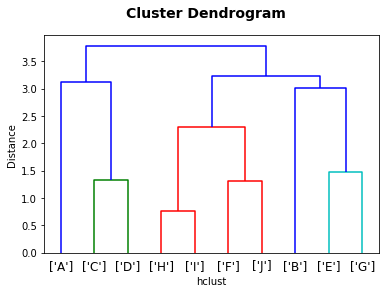

In [15]:
#Displaying the clusters in Dendrogram
dendrogram(clus2, labels = data[["Name"]].values.tolist())
plt.xlabel("hclust")
plt.ylabel("Distance")
plt.suptitle("Cluster Dendrogram", fontweight = 'bold', fontsize =14)

In [16]:
print(np.round(squareform(d_euc1).tolist(),3))

[[0.    4.482 3.596 2.648 4.499 4.195 4.615 3.58  3.725 4.796]
 [4.482 0.    4.045 3.66  2.843 2.327 3.184 3.798 3.578 3.127]
 [3.596 4.045 0.    1.332 3.08  3.772 3.567 3.861 4.273 3.785]
 [2.648 3.66  1.332 0.    3.377 3.007 3.526 3.085 3.386 3.206]
 [4.499 2.843 3.08  3.377 0.    3.617 1.483 3.419 3.67  3.592]
 [4.195 2.327 3.772 3.007 3.617 0.    3.343 2.477 2.293 1.308]
 [4.615 3.184 3.567 3.526 1.483 3.343 0.    2.589 2.754 2.951]
 [3.58  3.798 3.861 3.085 3.419 2.477 2.589 0.    0.767 2.23 ]
 [3.725 3.578 4.273 3.386 3.67  2.293 2.754 0.767 0.    2.168]
 [4.796 3.127 3.785 3.206 3.592 1.308 2.951 2.23  2.168 0.   ]]
